# Miniproyecto 1: Clasificación de MRI con Redes Neuronales Convolucionales para Tipos de Cáncer

Realizado por: Michael Bustos, Jairo Serrano

La resonancia magnética (MRI) desempeña un papel fundamental en la detección y 
clasificación  de  los  diferentes  tipos  de  cáncer  cerebral.  La  aplicación  de  redes 
neuronales convolucionales (CNN) ha incrementado notablemente la precisión en la 
interpretación  de  estos  volúmenes,  al  ser  entrenadas  para  reconocer  patrones  y 
características  distintivas  asociadas  a  cada  tipo  de  tumor.  Las  resonancias 
magnéticas  (MRI)  generan  volúmenes  tridimensionales  compuestos  por  múltiples 
capas, donde cada una corresponde a una imagen bidimensional del tejido analizado. 
Procesar  un  volumen  completo  implica  manejar  una  gran  cantidad  de  datos 
simultáneamente,  lo  que  puede  ser  computacionalmente  costoso  y  requerir 
considerable tiempo y recursos. Para este proyecto se trabajará exclusivamente con 
imágenes individuales extraídas de las capas de los MRI, en lugar de procesar el 
volumen completo. Esta estrategia simplifica la tarea al transformar el problema en 
una  clasificación  de  imágenes  bidimensionales,  reduciendo  significativamente  la 
carga computacional.

## Redes Neuronales Convolucionales 


Las CNN son especialmente adecuadas para el análisis de imágenes debido a su 
capacidad para captar características locales a través de convoluciones. Estas redes 
pueden ser entrenadas para clasificar las imágenes extraídas de los MRI en cuatro 
categorías: glioma, meningioma, pituitary (hipófisis) y tejido sano. Por ejemplo: 
- Glioma: Detecta masas anómalas con bordes irregulares y heterogeneidad en 
el tejido cerebral. 
- Meningioma: Identifica tumores bien delimitados originados en las meninges. 
- Pituitary: Clasifica adenomas hipofisarios en la región selar. 
- Tejido sano: Diferencia el tejido cerebral normal sin anomalías presentes. 

## Procesamiento de Imágenes 
El procesamiento de imágenes mediante redes neuronales convolucionales (CNN) 
involucra múltiples capas de convolución, activación y pooling, que permiten extraer y 
analizar  características  relevantes  de  las  imágenes.  Estas  técnicas  facilitan  una 
distinción precisa entre distintos tipos de tumores y el tejido sano, mejorando la 
exactitud del diagnóstico médico.

## Ventajas y Aplicaciones 
Implementar CNN para la clasificación de las imágenes extraídas de los MRI ofrece 
varias ventajas: 
- Eficiencia en el diagnóstico: Acelera el proceso de evaluación de imágenes, 
permitiendo  a  los  profesionales  médicos  enfocarse  en  otros  aspectos  del 
tratamiento. 
- Consistencia en la clasificación: Proporciona una clasificación uniforme y 
precisa, reduciendo la variabilidad entre evaluadores. 
- Asistencia  para  profesionales  menos  experimentados:  Ofrece  una 
herramienta valiosa para radiólogos en formación o con menos experiencia. 
- Mejora en la calidad del diagnóstico: Optimiza la detección temprana y el 
tratamiento adecuado de diferentes tipos de cáncer cerebral. 

## A.  Objetivo 
- Desarrollar un método basado en redes neuronales convolucionales que permita 
clasificar con exactitud imágenes extraídas de MRIs en una de las 4 categorías. 
 
## B.  Conjunto de datos 
- Los datos corresponden a un dataset de 7023 imágenes extraídas de MRIs tomados 
desde distintos ángulos y disponibles para dominio público. El dataset es accesible 
en el siguiente enlace. 
 
## C.  Actividades por realizar 
1. Preparación  de  las  imágenes  para  el  entrenamiento  y  prueba  del  modelo. 
Construya un pipeline para cargar las imágenes y dividirlas en conjuntos de 
entrenamiento y prueba. 
2. Desarrollo de la arquitectura de red neuronal convolucional para clasificación 
de las imágenes de MRI en una de las 4 categorías. La arquitectura es de libre 
elección, se recomienda utilizar bloques de convolución y max pooling o usar 
redes existentes y hacerles finetunning para este problema. 


In [ ]:
# Espacio para desarrollar el código del miniproyecto 1
#importar librerias
import cv2
import kagglehub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import torch 
from torch import nn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

c:\Users\LENOVO\anaconda3\envs\MAIA_Principios_ML\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Carga de datos

In [2]:
# Descargar el dataset
path = kagglehub.dataset_download("rm1000/brain-tumor-mri-scans")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\LENOVO\.cache\kagglehub\datasets\rm1000\brain-tumor-mri-scans\versions\1


In [ ]:
# Cargamos imagenes y etiquetas
def cargar_imagenes_etiquetadas(path_dataset, tamaño_redimensionar):
    """
    Carga todas las imágenes como arrays de NumPy
    """
    print("\n" + "="*60)
    print("CARGANDO IMÁGENES")
    print("="*60)
    
    # Listas para almacenar datos
    imagenes = []
    etiquetas = []
    rutas = []
    nombres_archivos = []
    dimensiones_originales = []
    
    formatos_imagen = ['.jpg', '.jpeg', '.png']
    contador = 0
    
    # Recorrer todas las carpetas
    for root, dirs, files in os.walk(path_dataset):
        for file in files:
            if any(file.lower().endswith(fmt) for fmt in formatos_imagen):
                ruta_completa = os.path.join(root, file)
                etiqueta = os.path.basename(root)  # La carpeta es la etiqueta
                
                try:
                    # Cargar imagen -- Como son radiografias usaremos escala de grises 
                    imagen = cv2.imread(ruta_completa,cv2.IMREAD_GRAYSCALE)
                    
                    if imagen is not None:
                
                        # Redimensionar si es necesario (para consistencia)
                        if tamaño_redimensionar:
                            imagen_redim = cv2.resize(imagen, tamaño_redimensionar)
                        else:
                            imagen_redim = imagen
                        
                        # Normalizar pixels a [0, 1]
                        imagen_normalizada = imagen_redim.astype(np.float32) / 255.0
                        
                        # Agregar a las listas
                        imagenes.append(imagen_normalizada)
                        etiquetas.append(etiqueta)
                        rutas.append(ruta_completa)
                        nombres_archivos.append(file)
                        dimensiones_originales.append(imagen.shape)
                        
                        contador += 1
                        
                        # Mostrar progreso
                        if contador % 1000 == 0:
                            print(f"Cargadas {contador} imágenes...")
                
                except Exception as e:
                    print(f"Error cargando {ruta_completa}: {e}")      
    
    # Convertir a arrays de NumPy
    X = np.array(imagenes)
    y = np.array(etiquetas)
    

    print("\nCarga completada:")
    print(f"   - Imágenes cargadas: {X.shape}")
    print(f"   - Etiquetas: {len(y)}")
    print(f"   - Dimensiones: {X[0].shape}")
    print(f"   - Dimensiones originales: {dimensiones_originales[0]}")
    
    return X, y, rutas, nombres_archivos, dimensiones_originales


# Cargar las imágenes (puedes ajustar max_imagenes para pruebas)
X, y, rutas, nombres_archivos, dimensiones = cargar_imagenes_etiquetadas(
    path, 
    tamaño_redimensionar=(256,256)  # Tamaño consistente para el modelo
)


CARGANDO IMÁGENES
Cargadas 1000 imágenes...
Cargadas 2000 imágenes...
Cargadas 3000 imágenes...
Cargadas 4000 imágenes...
Cargadas 5000 imágenes...
Cargadas 6000 imágenes...
Cargadas 7000 imágenes...

Carga completada:
   - Imágenes cargadas: (7023, 256, 256)
   - Etiquetas: 7023
   - Dimensiones: (256, 256)
   - Dimensiones originales: (512, 512)


## Visualización de imagenes

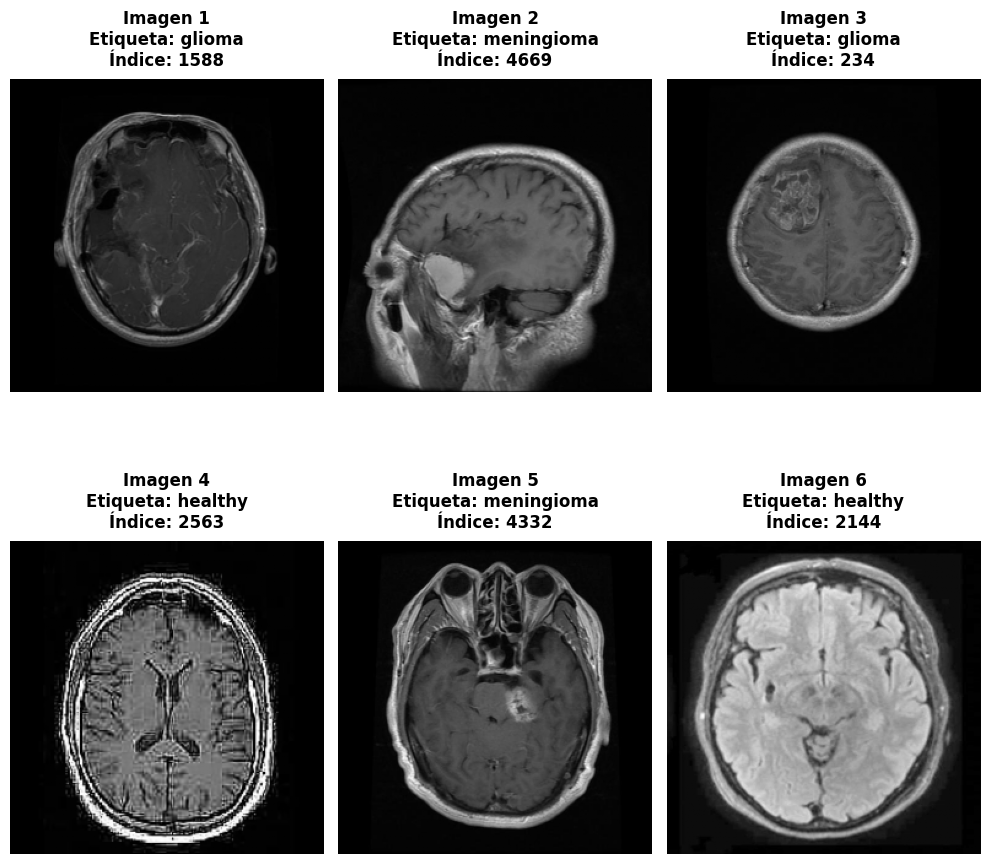

In [ ]:
def graficar_imagenes(X, y, w=6, indices=None):
    """
    Grafica w imágenes con sus etiquetas
    """
    #Imagenes aleatorias
    indices = np.random.choice(len(X), w, replace=False)
    # Calcular grid
    n_cols = min(3, w)  # Máximo 3 columnas para mejor visualización
    n_rows = int(np.ceil(w / n_cols))
    
    # Crear figura
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows))
    
    # Si hay solo una imagen
    if w == 1:
        axes = np.array([axes])
    else:
        axes = axes.flatten()
    
    for i, idx in enumerate(indices):
        imagen = X[idx]
        # Convertir ya que la imagen esta normalizada [0,1] a [0,255] para graficar
        imagen_graficar = (imagen * 255).astype(np.uint8)
        # Graficar imagen en escala de grises
        axes[i].imshow(imagen_graficar, cmap='gray')
        axes[i].set_title(f'Imagen {i+1}\nEtiqueta: {y[idx]}\nÍndice: {idx}', 
                         fontsize=12, pad=10, weight='bold')
        axes[i].axis('off')
    
    # Ocultar ejes sobrantes
    for i in range(w, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

#Graficar imagenes
graficar_imagenes(X, y, w=6)


## Procesamiento de datos

In [ ]:
# Verificar GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

def procesamiento_datos(X,y):
    # Codificar etiquetas
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    #Convertimos nuestros datos en tensores
    X=torch.tensor(X, dtype=torch.float32)
    y_encoded=torch.tensor(y_encoded, dtype=torch.long) #int64

    #Los datos estan en escala de gris es necesario agregar el canal de color 
    # Agrega un canal en la posición 1 (índice 0 es el lote, 1 es el canal)
    X = X.unsqueeze(1)

    #Esta función separa los datos en los conjuntos de entrenamiento y prueba. Escoge los conjuntos de forma aleatoria.
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                       y_encoded,
                                                       test_size = 0.2, #20% test y 80% entrenamiento
                                                       random_state = 0)
    
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)

    batch_size = 64

    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False) # No se neceita el shuffle para los datos de test


    return train_dataloader,test_dataloader

#Procesamos los datos 
train_dataloader,test_dataloader = procesamiento_datos(X,y)

Usando dispositivo: cpu


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14452\983804204.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X=torch.tensor(X, dtype=torch.float32)


In [ ]:
class ClassifierModelCNN(nn.Module):
    def __init__(self, num_classes=4):
        #Inicializamos la clase
        super().__init__()
        
        # Capas convolucionales
        self.conv_layers = nn.Sequential(
            # Bloque 1
            nn.Conv2d(1, 32, kernel_size=3, padding=1),     # (canales_de_entrada, canales de salida, tamaño del kernel, paddig) 
            nn.BatchNorm2d(32),                             # Normalizacion Batch                  
            nn.ReLU(),                                      # Funcion de activación
            nn.Conv2d(32, 32, kernel_size=3, padding=1),    # (canales_de_entrada, canales de salida, tamaño del kernel, paddig) 
            nn.BatchNorm2d(32),                             # Normalizacion Batch 
            nn.ReLU(),                                      # Funcion de activación
            nn.MaxPool2d(2),                                # Aplicacion pooling maximo de 2D (2x2)  Reduce el tamaño espacial del mapa de características
            nn.Dropout(0.25),                               # Técnica de regularización que desactiva aleatoriamente (establece a cero) una fracción de las neuronas de la capa de entrada durante el entrenamiento.
                                                            #0.25: La probabilidad de que una neurona sea "descartada" es del 25%.
            
            # Bloque 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.25),
            
            # Bloque 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.25),
            
            # Bloque 4
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((4, 4)),                    #Aplica un pooling promedio que se adapta al tamaño de la entrada para producir una salida de tamaño fijo.
                                                             #(4,4):Redimensiona el mapa de características a una salida de 4x4, independientemente de las dimensiones espaciales de la entrada.
            nn.Dropout(0.5)
        )
        
        # Capas fully connected
        self.fc_layers = nn.Sequential(
            nn.Linear(256 * 4 * 4, 512),        # (Numero de caracteristicas * Resolucion espacial, Numeros de neuronas)
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),                #(Entradas,salidas)
            nn.ReLU(),
            nn.Dropout(0.3),                    #Aplica dropout con una probabilidad del 30% en esta capa.
            nn.Linear(256, num_classes)         #(Entradas,salidas)
        )
    
    def forward(self, x):
        x = self.conv_layers(x)     # Pasa el tensor de entrada x a través de todas las capas convolucionales definidas en self.conv_layers
        x = x.view(x.size(0), -1)   # Flatten -> El tensor (batch_size, 256, 4, 4) se convierte en (batch_size, 256 * 4 * 4).
        x = self.fc_layers(x)       # Pasa el tensor aplanado a través de las capas totalmente conectadas (self.fc_layers) para realizar la clasificación.
        return x

### Instancia de nuestro modelo

In [ ]:
torch.manual_seed(0)
torch.cuda.manual_seed(0)
model = ClassifierModelCNN().to(device)

## Entrenamiento 

In [ ]:
#Esta función conocida como accuracy o exactitud nos dará una medida de qué tan bien está clasificando nuestra red.
#Esta métrica es simplemente el porcentaje de clasificaciones correctas que ha hecho el modelo sobre el total de predicciones
#realizadas.
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

In [ ]:
def LossAndOptim():
    
    #Acá, puede cambiar la funciíon de perdida por cualquiera que desee.
    #En este taller inicializamos con la función de pérdida L1.
    #Puede probar con nn.BCEWithLogitsLoss(), nn.L1Loss(), etc.
    loss_fn = nn.CrossEntropyLoss()

    #Acá, puede cambiar el optimizador para el entrenamiento.
    #En este taller inicializamos con el optimizador de descenso del gradiente estocástico
    #y con una tasa de aprendizaje de 0.07.
    optimizer = torch.optim.SGD(params = model.parameters(),
                              lr = 0.07)
    return loss_fn, optimizer

In [ ]:
def TrainNetwork(model_1,epochs,loss_fn,optimizer,train_dataloader,test_dataloader,patience):
    #Fijamos una semilla aleatoria para que nuestros resultados sean reproducibles.
    torch.manual_seed(0)
    torch.cuda.manual_seed(0)
    #Guardamos diferentes valores para luego graficarlos. Guardaremos las épocas
    #y la pérdida y exactitud de prueba y entrenamiento.
    epoch_count = []
    loss_values = []
    test_loss_values = []
    train_acc_values = []
    test_acc_values = []
    
    # Variables para Early Stopping
    best_test_loss = float('inf')
    patience_counter = 0
    best_model_state = None

    #Iteramos en cada época.
    for epoch in range(epochs):
        #Le decimos al modelo que se ponga en 'modo de entrenamiento'.
        model_1.train()
        sum_loss=0
        sum_acc=0

        for X_train, y_train in train_dataloader:
            #Le decimos que haga los cálculos en la GPU.
            X_train = X_train.to(device)
            y_train = y_train.to(device)

            #2.Hacemos un paso forwarad.
            y_logits = model_1(X_train)
            # Para multi-clase: usar softmax + argmax en lugar de sigmoid + round
            y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)


            #3. Calculamos la pérdida y la exactitud de nuestro modelo para los datos para los que hicimos
            #el paso forward en el paso 2.
            loss = loss_fn(y_logits, y_train)
            acc = accuracy_fn(y_true = y_train,y_pred = y_pred)

            #Esta función 'reinicia' los gradientes. Se utiliza cuando estamos entrenando por batches de datos y tenemos
            #memoria limitada. PyTorch per defecto acumula los gradientes de un batch y cuando pasamos de un batch a otro,
            #debemos reiniciar el gradiente.
            optimizer.zero_grad()

            #4. Utilizamos el algoritmo de retropropagación para estimar el gradiente de la pérdida.
            loss.backward()

            #5. Utilizamos el algoritmo de descenso del gradiente estocástico para actualizar los pesos de nuestra
            #red.
            optimizer.step()
            #Suma de la perdida total del lote
            sum_loss += loss.item() * X_train.size(0)
            #Suma exactitud
            sum_acc += acc * X_train.size(0)


        #Calcula la pérdida promedio de la época
        train_loss = sum_loss / len(train_dataloader.dataset)
        train_acc = sum_acc / len(train_dataloader.dataset)


        #Le decimos al modelo que se ponga en 'modo de evaluación'.
        model_1.eval()
        sum_loss_test=0
        sum_acc_test=0
        with torch.inference_mode():

            for X_test, y_test in test_dataloader:
                #Le decimos que haga los cálculos en la GPU.
                X_test = X_test.to(device)
                y_test = y_test.to(device)

                test_logits = model_1(X_test)
                test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
                
                #Calculamos la pérdida y la exactitud en el conjunto de prueba
                test_loss = loss_fn(test_logits, y_test)
                test_acc = accuracy_fn(y_true = y_test,y_pred = test_pred)

                #Suma de la perdida total del lote
                sum_loss_test += test_loss.item() * X_test.size(0)
                #exactitud
                sum_acc_test += test_acc * X_test.size(0)
        
        
        
        #Calcula la pérdida promedio de la época  
        test_loss = sum_loss_test / len(test_dataloader.dataset)
        test_acc = sum_acc_test / len(test_dataloader.dataset)
            


        #Vamos a guardar los resultados cada 2 épocas para luego graficarlos.
        if epoch % 2 == 0:
            epoch_count.append(epoch)
            loss_values.append(train_loss)
            test_loss_values.append(test_loss)
            train_acc_values.append(train_acc)
            test_acc_values.append(test_acc)
            
            
        # ===== EARLY STOPPING =====
        if test_loss < best_test_loss:
            # Mejoramos la pérdida de prueba
            best_test_loss = test_loss
            patience_counter = 0
            # Guardamos el mejor modelo
            best_model_state = model_1.state_dict().copy()
            print(f"Epoch {epoch}: Mejor pérdida de prueba: {test_loss:.4f} (Guardando modelo)")
        else:
            # No mejoramos, incrementamos contador
            patience_counter += 1
            print(f"Epoch {epoch}: Pérdida de prueba: {test_loss:.4f} (No mejora: {patience_counter}/{patience})")
        
        # Verificar si debemos parar
        if patience_counter >= patience:
            print(f"Early Stopping en epoch {epoch}. No hubo mejora en {patience} épocas.")
            print(f"Mejor pérdida de prueba: {best_test_loss:.4f}")
            
            # Cargar el mejor modelo antes de retornar
            model_1.load_state_dict(best_model_state)
            break
        
        # Print de progreso cada época
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%")

    # Si terminamos todas las épocas sin early stopping, cargar el mejor modelo
    if best_model_state is not None:
        model_1.load_state_dict(best_model_state)
        
    #Guardamos los resultados del entrenamiento para luego graficarlos.
    results = {"train_loss": loss_values,
              "train_acc": train_acc_values,
              "test_loss": test_loss_values,
              "test_acc":test_acc_values}
    return results

In [ ]:
#Por cuántas épocas queremos entrenar.
epochs = 100
patience=25           # Paciencia (épocas sin mejora)
#Le decimos al modelo qué función de pérdida y optimizador usar.
loss_fn,optimizer = LossAndOptim()


In [ ]:
TrainingCurves = TrainNetwork(model,epochs,loss_fn,optimizer,train_dataloader,test_dataloader)

In [ ]:
# Función para trazar curvas de pérdida de un modelo
def plot_loss_curves(results):
    """Trazar las curvas de entrenamiento de un diccionario de resultados.

    Args:
        results (dict): diccionario que contiene listas de valores, p. ej.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    loss = np.array(torch.tensor(results["train_loss"]).cpu().numpy())
    test_loss = np.array(torch.tensor(results["test_loss"]).cpu().numpy())
    accuracy = np.array(torch.tensor(results["train_acc"]).cpu().numpy())
    test_accuracy = np.array(torch.tensor(results["test_acc"]).cpu().numpy())

    epochs = range(0,len(np.array(torch.tensor(results["train_loss"]).cpu().numpy()))*2,2)

    plt.figure(figsize = (15, 7))

    # Trazar la pérdida
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label = "Pérdida de entrenamiento")
    plt.plot(epochs, test_loss, label = "Pérdida de prueba")
    plt.title("Pérdida")
    plt.xlabel("Épocas")
    plt.legend()

    # Trazar la exactitud
    plt.subplot(1, 2, 2)
    # Umbral 90% de precisión 
    plt.plot(epochs, 90*np.ones(len(epochs)), 'red', lw = 3, label = 'Umbral')
    plt.plot(epochs, accuracy, label = "Exactitud de entrenamiento")
    plt.plot(epochs, test_accuracy, label = "Exactitud de prueba")
    plt.title("Exactitud")
    plt.xlabel("Época")
    plt.legend()
    plt.show()

In [ ]:
plot_loss_curves(TrainingCurves)